In [1]:
import numpy as np
import math
from sklearn.datasets import load_iris
iris_dataset = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                   test_size=0.3,random_state=0)

In [7]:
def change_target_names(dataset):
    y=[]
    for i in dataset:
        if i ==0:
            y.append('setosa')
        elif i ==1:
             y.append('versicolor')
        elif i ==2:
             y.append('virginica')
    return y

def Change(dataset):
    X=np.ones((dataset.shape[0],dataset.shape[1]))
    for i1 in range(dataset.shape[1]):
        train=X_train[:,i1]
        min=np.min(train)
        size=(np.max(train)-np.min(train))/10
        for i2 in range(dataset.shape[0]):
            if i1==0 or i1==3 or i1==1 or i1==2:
                if dataset[i2,i1] <=min+3.33*size:
                    X[i2,i1]=0
                elif min+3.33*size< dataset[i2,i1] <=min+6.66*size:
                    X[i2,i1]=1
                else:
                    X[i2,i1]=2          
    return X.astype(np.int64)

In [8]:
def New_change():
    H=[]
    for i in Change(X_train):
        H.append(list(i))
    y=list(change_target_names(y_train))
    new_data=[]
    w=0
    for data in H:
        data.append(y[w])
        new_data.append(data)
        w+=1
    return new_data
New_change()

[[0, 0, 1, 1, 'versicolor'],
 [1, 1, 2, 2, 'virginica'],
 [2, 1, 2, 2, 'virginica'],
 [1, 0, 2, 1, 'virginica'],
 [2, 0, 2, 2, 'virginica'],
 [1, 0, 1, 1, 'versicolor'],
 [2, 1, 2, 2, 'virginica'],
 [1, 1, 1, 1, 'versicolor'],
 [1, 0, 1, 1, 'versicolor'],
 [1, 0, 1, 2, 'virginica'],
 [1, 1, 2, 1, 'virginica'],
 [0, 0, 1, 2, 'virginica'],
 [1, 0, 2, 2, 'virginica'],
 [2, 1, 1, 1, 'versicolor'],
 [1, 1, 2, 2, 'virginica'],
 [1, 1, 1, 1, 'versicolor'],
 [0, 1, 0, 0, 'setosa'],
 [1, 0, 2, 2, 'virginica'],
 [1, 0, 1, 1, 'versicolor'],
 [1, 1, 1, 1, 'versicolor'],
 [1, 0, 1, 1, 'versicolor'],
 [1, 1, 1, 1, 'versicolor'],
 [2, 1, 2, 2, 'virginica'],
 [0, 2, 0, 0, 'setosa'],
 [0, 1, 0, 0, 'setosa'],
 [1, 0, 2, 2, 'virginica'],
 [1, 1, 1, 1, 'versicolor'],
 [0, 1, 0, 0, 'setosa'],
 [1, 2, 0, 0, 'setosa'],
 [2, 1, 1, 1, 'versicolor'],
 [0, 1, 0, 0, 'setosa'],
 [1, 1, 2, 2, 'virginica'],
 [0, 0, 0, 1, 'versicolor'],
 [0, 1, 0, 0, 'setosa'],
 [1, 0, 1, 1, 'versicolor'],
 [2, 2, 2, 2, 'virginica'],

In [9]:
import math
import operator
 
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  # サンプルの数
    # dictionaryを作る：keyは最後の列の値（目的クラス）で、valueはその目的クラスに属するサンプルの数
    labelCounts = {}
    for featVec in dataSet: # 1行ずつ、配列をトラバース
        currentLabel = featVec[-1]  #最後の列の値（目的クラス）を取得する
        #もし、その目的クラスはdictionaryのkeyではないの場合、追加する、value＝０
        if currentLabel not in labelCounts.keys(): 
            labelCounts[currentLabel] = 0
        #その目的クラスはdictionaryのkeyとして存在する場合、value＋１
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0  # 情報量を初期化する
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*math.log(prob, 2) #情報量を計算する
    return shannonEnt
     
def CreateDataSet():
    dataset = New_change()
    labels = ['sepal length','sepal width','petal length','petal width']
    return dataset, labels

def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
     
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGainRatio = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        splitInfo = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            splitInfo += -prob * math.log(prob, 2)
        infoGain = baseEntropy - newEntropy
        if (splitInfo == 0): # fix the overflow bug
            continue
        infoGainRatio = infoGain / splitInfo
        if (infoGainRatio > bestInfoGainRatio):
            bestInfoGainRatio = infoGainRatio
            bestFeature = i
    return bestFeature


 
def majorityCnt(classList):
    classCount ={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]=1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    if(bestFeat == -1):#特征一样，但类别不一样，即类别与特征不相关，随机选第一个类别做分类结果
        return classList[1] 
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree
    
    
myDat,labels = CreateDataSet()
C1=createTree(myDat,['sepal length','sepal width','petal length','petal width'])
C1

{'petal width': {0: 'setosa',
  1: {'petal length': {0: 'versicolor', 1: 'versicolor', 2: 'virginica'}},
  2: {'petal length': {1: {'sepal width': {0: 'virginica', 1: 'versicolor'}},
    2: {'sepal length': {1: 'virginica',
      2: {'sepal width': {0: 'virginica',
        1: 'virginica',
        2: 'virginica'}}}}}}}}

In [22]:
C2={'petal width': {0: 'setosa',
  1: {'petal length': {0: 'versicolor', 1: 'versicolor', 2: 'virginica'}},
  2: {'petal length': {1: {'sepal width': {0: 'virginica', 1: 'versicolor'}},
    2:'virginica'}}}}

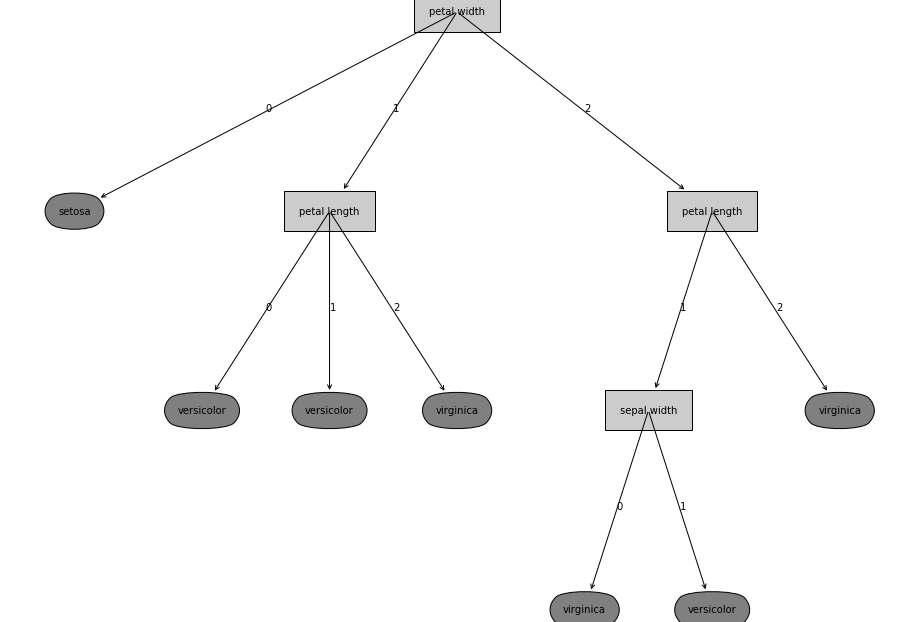

In [23]:
treeplotter.createPlot(C2)

In [10]:
classify(C1,['sepal length','sepal width','petal length','petal width'],[1,0,1000,3])

NameError: name 'classify' is not defined

In [6]:
myDat,labels = CreateDataSet()
C2=createTree(myDat,labels)
C2

{'petal width': {0: 'setosa',
  1: {'petal length': {1: 'versicolor',
    2: 'versicolor',
    3: {'sepal length': {1: {'sepal width': {0: 'virginica', 1: 'versicolor'}},
      2: 'versicolor'}},
    4: 'virginica'}},
  2: {'petal length': {2: 'virginica',
    3: {'sepal width': {0: 'virginica',
      1: {'sepal length': {1: 'virginica', 2: 'virginica'}}}},
    4: 'virginica'}}}}

In [ ]:
{'petal width': {0: 'setosa',
  1: {'petal length': {1: 'versicolor',
    2: 'versicolor',
    3: {'sepal length': {1: {'sepal width': {0: 'virginica', 1: 'versicolor'}},
      2: 'versicolor'}},
    4: 'virginica'}},
  2: {'petal length': {2: 'virginica',
    3: {'sepal width': {0: 'virginica',
      1: {'sepal length': {1: 'virginica', 2: 'virginica'}}}},
    4: 'virginica'}}}}

In [130]:
#输入三个变量（决策树，属性特征标签，测试的数据）
def classify(inputTree,featLables,testVec):
    firstStr=list(inputTree.keys())[0] #获取树的第一个特征属性
    secondDict=inputTree[firstStr] #树的分支，子集合Dict
    featIndex=featLables.index(firstStr) #获取决策树第一层在featLables中的位置
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            global classLabel   #声明
            if type(secondDict[key]).__name__=='dict':
                classLabel=classify(secondDict[key],featLables,testVec)
            else:classLabel=secondDict[key]
    return classLabel
labels = ['sepal length','sepal width','petal length','petal width']

In [131]:
labels = ['sepal length','sepal width','petal length','petal width']
classify(C1,labels,[1,1,1,1])

'versicolor'

In [132]:
def ID3(X):
    test_data=Change(X)   #使用临时变量得到输入数组的大小
    y_pred=np.ones((test_data.shape[0]))
    w=0
    labels = ['sepal length','sepal width','petal length','petal width']
    for data in test_data:
        if classify(C1,labels,data) == "setosa":
            y_pred[w]=0
        elif classify(C1,labels,data) == "versicolor":
            y_pred[w]=1
        elif classify(C1,labels,data) == "virginica":
            y_pred[w]=2
        w+=1
    return y_pred

In [133]:
def Test_set_score(Test_data,Result,Papers):
    #print("Test set score: {:.2f}".format(np.mean(Result == Papers)))
    length=len(Result)
    #for i in range(length):
        #if Result[i] != Papers[i]:
            #print("X_test{0}     y_pred:{1}    y_test:{2}".format(Test_data[i],Result[i],Papers[i]))
    return np.mean(Result == Papers)

In [134]:
Test_set_score(X_test,ID3(X_test),y_test)

0.93333333333333335

In [144]:
for wwe in ([0.1,0.2,0.3,0.4,0.5]):
    SET=[]
    for i in range(100):
        X_train, X_test, y_train, y_test =train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                       test_size=wwe,random_state=i)
        myDat,labels = CreateDataSet()
        C1=createTree(myDat,labels)
        SET.append(Test_set_score(X_test,ID3(X_test),y_test))
    print(np.mean(SET))

0.927333333333
0.937
0.930888888889
0.932333333333
0.928533333333


In [12]:
import 决策树可视化 as treeplotter
treeplotter.createPlot(C1)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\windows\\fonts\\simsun.ttc'

In [15]:
import 可視化 as treeplotter

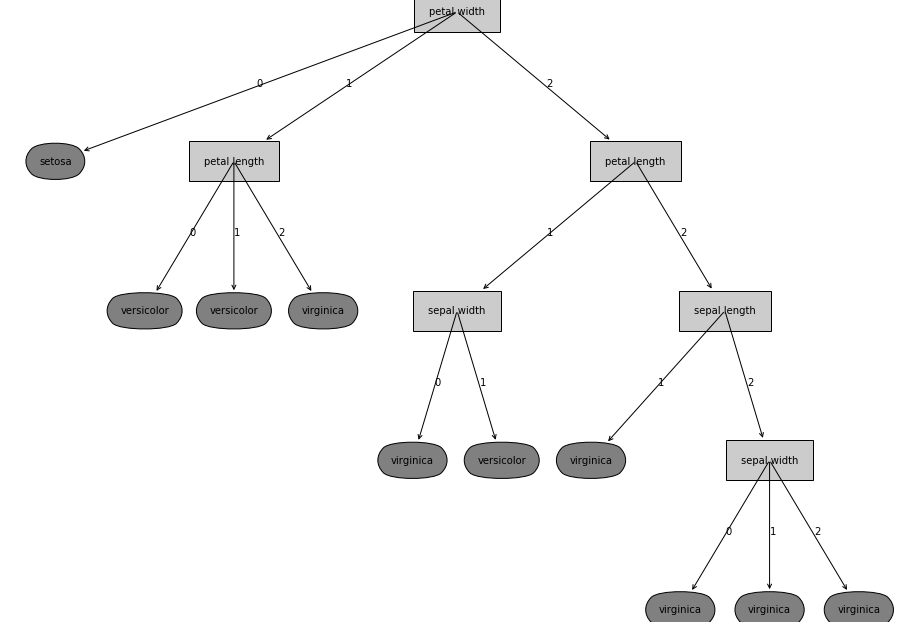

In [17]:
treeplotter.createPlot(C1)